# 🔻 [Return to workflow](#leftoff)

# 🏡 **AirBNB Dataset Review** 🏨

# ❌ Update target audience and guiding questions

---

**Who?**
>* 🏢 **AirBNB Corporate** interested in maximizing customer satisfaction to increase repeat guests and encourage new guests to stay with AirBNB hosts
>
>
>* 🏡**AirBNB hosts** interested in maximizing the ratings

**Why?**
>* 💰 **Revenue Management:** 
>
>
>
>* 🤝 **Sales:**
>
>
>
>* 🛌 **Rooms Ops:**

>
>
>

**What?**
>* 🧾 Dataset comprised of... 
>  * # different features
>  * # reservation records
>  * Source cited in Readme

❌ **How?**
>* Which models/methods?
>* Data prep and feature engineering

---

# 🎯  **Goal:**

Determining whether or not a host location would receive a score greater than or equal to 4/5 (defined by `'review_scores_rating'`).

# 📌 **To-Do**

---

- [ ] [TD1](#td1)
- [ ] [TD2](#td2)
- [ ] [TD3](#td3)
- [ ] [todo4](#td4)
- [ ] [todo5](#td5)
- [ ] [todo6](#td6)
- [ ] [todo7](#td7)

---

# 📂 **Imports and Settings**

In [1]:
## Data Handling
import pandas as pd
import numpy as np
from scipy import stats

## Visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact_manual
import missingno

## Modeling - SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn import set_config
set_config(display='diagram')

# from sklearn.naive_bayes import MultinomialNB # for naive bayes model

## Settings
%matplotlib inline
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)

In [2]:
## Personal functions
import clf_functions.functions as cf
%load_ext autoreload
%autoreload 1
%aimport clf_functions.functions

## ✅ Show Visualizations Setting

In [3]:
## Controlling whether or not to show visualizations
show_visualizations = False

## ❓ FSDS

In [4]:
# import fsds as fs

In [5]:
# fs.ihelp_menu([fs.ihelp_menu, sort_report])

# 📖 **Read Data**

In [6]:
## Reading data and saving to a DataFrame

source = 'data/listings.csv.gz'

data = pd.read_csv(source)

In [7]:
## Inspecting imported dataset
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

In [8]:
## Checking number of rows and columns
data.shape

(8033, 74)

---

> The initial read of the dataset shows there are 74 features and 8,033 entries. A quick glance at the `.head()` gives a sample of the entries, showing that some of the features are not relevant to my analysis.
>
> I need to get a better idea of the statistics for the dataset, especially any missing values and the datatypes for each column. I need to pre-process this data before I can perform any modeling.

---

# 👨‍💻 **Interactive Investigation**

---

> To increase accessibility to the data, **I include a widget to allow the user to sort through the data interactively.** I use [**Jupyter Widgets**](https://ipywidgets.readthedocs.io/en/latest/index.html) to create this interactive report.
>
>**To use:** select which column by which you would like to sort from the dropdown menu, then click the "Run Interact" button.
>
>***Note about 'Drop_Cols' and Cols:*** these keyword arguments are used to allow the user to drop specific columns.
>
> **Only click the "Drop_Cols" option when specifying "Cols"!** Otherwise it will cause an error.
>
>The 'Cols' dropdown menu does not affect the resulting report; the data is filtered from the report prior to displaying the results. 
>
>I chose to include this option for flexibility and adaptability, but it does have the unintended consequence of creating another drop-down menu. Please ignore this menu, as it does not provide any additional functionality. For future work, I will disable the menu to prevent confusion.

---

In [9]:
## Running report on unfiltered dataset

interact_manual(cf.sort_report, Sort_by=list(cf.report_df(data).columns),
                Source=source);

interactive(children=(Text(value='data/listings.csv.gz', description='Source'), Dropdown(description='Sort_by'…

In [10]:
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3686,https://www.airbnb.com/rooms/3686,20210710190002,2021-07-11,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,https://a0.muscache.com/pictures/61e02c7e-3d66...,4645,https://www.airbnb.com/users/show/4645,Vita,2008-11-26,"Washington D.C., District of Columbia, United ...","I am a literary scholar, teacher, poet, vegan ...",within a day,80%,75%,f,https://a0.muscache.com/im/users/4645/profile_...,https://a0.muscache.com/im/users/4645/profile_...,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Washington, District of Columbia, United States",Historic Anacostia,nan,38.86,-76.99,Private room in house,Private room,1,nan,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,nan,t,1,31,61,336,2021-07-11,75,3,0,2014-06-22,2021-01-12,4.59,4.71,4.44,4.89,4.82,3.80,4.58,NaN,f,2,0,2,0,0.87
1,3943,https://www.airbnb.com/rooms/3943,20210710190002,2021-07-11,Historic Rowhouse Near Monuments,Please contact us before booking to make sure ...,This rowhouse is centrally located in the hear...,https://a0.muscache.com/pictures/432713/fab7dd...,5059,https://www.airbnb.com/users/show/5059,Vasa,2008-12-12,"Washington, District of Columbia, United States",I have been living and working in DC for the l...,within a few hours,100%,29%,f,https://a0.muscache.com/im/pictures/user/8ec69...,https://a0.muscache.com/im/pictures/user/8ec69...,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",nan,38.91,-77.00,Private room in townhouse,Private room,2,nan,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",nan,t,9,39,69,344,2021-07-11,429,0,0,2010-08-08,2018-08-07,4.82,4.89,4.91,4.94,4.90,4.54,4.74,NaN,f,2,0,2,0,3.22
2,4529,https://www.airbnb.com/rooms/4529,20210710190002,2021-07-11,Bertina's House Part One,This is large private bedroom with plenty of...,Very quiet neighborhood and it is easy accessi...,https://a0.muscache.com/pictures/86072003/6709...,5803,https://www.airbnb.com/users/show/5803,Bertina'S House,2008-12-30,"Washington, District of Columbia, United States","I am an easy going, laid back person who loves...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/5803/profile_...,https://a0.muscache.com/im/users/5803/profile_...,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Washington, District of Columbia, United States","Eastland Gardens, Kenilworth",nan,38.91,-76.94,Private room

---

> After reviewing my data, I see there are several features that contain irrelevant entries (URLs, source data, meta data) or values that are too complicated for simple processing (such as host and listing descriptions).
>
> I will drop these columns for the second report to review the remaining data for further processing.

---

In [11]:
## Specifying columns to drop

drop = ['id', 'host_id', 'name', 'description', 'neighborhood_overview', 'host_name',
        'host_about', 'host_location', 'neighbourhood', 'property_type',
        'listing_url', 'scrape_id', 'last_scraped', 'picture_url','host_url',
        'host_thumbnail_url','host_picture_url','calendar_last_scraped']

In [12]:
## Creating updated interactive report

interact_manual(cf.sort_report, Drop_Cols = True, Cols = drop,
                Sort_by=list(cf.report_df(data).columns), Source=source);

interactive(children=(Text(value='data/listings.csv.gz', description='Source'), Dropdown(description='Sort_by'…

---

> **Interpretation:**
>
> The report shows that the dataset has a big problem with missing values:
>
> * **Empty:**
>   * `neighbourhood_group_cleansed`
>   * `bathrooms`
>   * `calendar_updated`
>
>
> * **Nearly empty:**
>  * `license`
>
>
> * **Missing 26-39% of data:**
>  * `host_about`
>  * `neighborhood_overview`
>  * `neighbourhood`
>  * `host_response_time`
>  * `host_response_rate`
>  * `review_scores_value`
>  * `review_scores_checkin`
>  * `review_scores_location`
>  * `review_scores_accuracy`
>  * `review_scores_communication`
>  * `review_scores_cleanliness`
>  * `host_acceptance_rate`
>  * `reviews_per_month`
>  * `first_review`
>  * `review_scores_rating`
>  * `last_review`
>
>---
>
> I will need to address these missing values before processing with the modeling. A few options include:
>
> * **Filling with the string "missing"** to indicate the value was missing.
>    * *I would be able to treat "missing" as a distinct category and use it for modeling as well.*
>
>
> * **Dropping the rows with missing values.**
>    * *This may negatively impact the accuracy of my results by overfitting to the training data.*
>
>
> * I could **use the `SimpleImputer` tool from SKLearn to fill the missing values** with the mean, median, or mode values for each.
>    * *I could couple this with a `GridSearchCV` to identify the method that has the strongest positive impact on my classification metrics.*

---

---

> To get a better idea of the missing values, I create a visual of the values via the 'Missingno' package. This visualization package includes several options for visualizing the missing data.

---

In [13]:
## Visually inspecting missing values
if show_visualizations == True:
    missingno.bar(data, labels=True);

---

> Based on this visualization, I see that **there is a consistent trend in missing values for review scores:** if a row is missing one review score, it seems to be missing all of them.
>
> Additionally, **there are many missing values for the response time, response rate, and acceptance rate.** I want to use these columns in my classification, so I will need to replace those missing values.
>
> After reviewing these details, **I feel more comfortable with the option of dropping those rows with missing review values.** I will drop the values as part of my overall classification process.

---

# 🧼 **Data Cleaning and EDA**

## 🔎 Fixing Missing Values

---

> This dataset is missing a significant number of values for different columns. **In order to perform any modeling, I will need to address these missing values first.**
>
> Depending on the feature and the number of missing values per row, I will take different approaches to keep as much data as possible and in its original state.

---

In [14]:
# Dropping features with high percentages (25%+) of missing values

drop_na_cols = []
for col in data.columns:
    if ((data[col].isna().sum()) / len(data[col])) > .25 and col != 'review_scores_rating':
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month']

In [15]:
## Appending previous list of columns to drop (metadata, etc.)

for col in drop:
    if col not in drop_na_cols:
        drop_na_cols.append(col)

drop_na_cols

['neighborhood_overview',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'reviews_per_month',
 'id',
 'host_id',
 'name',
 'description',
 'host_name',
 'host_location',
 'property_type',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url',
 'calendar_last_scraped']

In [16]:
## Creating new dataframe that does not include the features to drop
df = data.drop(columns= drop_na_cols).copy()
df

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,2020-08-03,f,Southeast Washington,0.00,0.00,"['email', 'phone']",t,f,"Congress Heights, Bellevue, Washington Highlands",38.83,-77.00,Entire home/apt,8,1 bath,3.00,3.00,"[""First aid kit"", ""Dedicated workspace"", ""Smok...",$400.00,2,2,2,2,1125,1125,2.00,"1,125.00",t,17,43,73,348,0,0,0,nan,t,1,1,0,0
8029,2020-07-29,f,East Forest,125.00,125.00,"['email', 'phone']",t,t,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.02,Entire home/apt,5,2 baths,2.00,nan,"[""Cooking basics"", ""Lockbox"", ""Long term stays...",$198.00,90,365,90,90,365,365,90.00,365.00,t,30,60,90,365,0,0,0,nan,t,215,215,0,0
8030,2016-04-27,f,Near Northeast/H Street Corridor,32.00,32.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,2,1 bath,1.00,2.00,"[""Cooking basics"", ""Shampoo"", ""Dedicated works...",$70.00,30,1125,30,30,1125,1125,30.00,"1,125.00",t,30,60,90,364,0,0,0,nan,f,30,30,0,0
8031,2020-09-23,f,Cherry Creek,"2,232.00","2,232.00","['email', 'phone']",t,t,"Shaw, Logan Circle",38.91,-77.03,Entire home/apt,3,1 bath,1.00,nan,"[""Cooking basics"", ""Elevator"", ""Lockbox"", ""Lon...",$223.00,91,365,91,91,365,365,91.00,365.00,t,30,60,90,365,0,0,0,nan,t,50,50,0,0


In [17]:
## Confirming dropped columns with high missing values
cf.report_df(df)

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
host_since,object,2415,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,object,183,741,0.09,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,float64,57,136,0.02,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,float64,57,136,0.02,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_verifications,object,297,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,object,39,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
latitude,float64,5113,0,0.00,"8,033.00",38.91,0.02,38.82,38.90,38.91,38.92,39.00


In [18]:
## Filling missing values for 'beds' with values for 'bedrooms'

for idx in list(df['beds'][df['beds'].isna()].index):
    if df['bedrooms'][idx] > 0:
        df['beds'][idx] = df['bedrooms'][idx]

<ipython-input-18-736ac37997da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beds'][idx] = df['bedrooms'][idx]


In [19]:
## Filling missing values for 'bedrooms' with values for 'beds'

for idx in list(df['bedrooms'][df['bedrooms'].isna()].index):
    if df['beds'][idx] > 0:
        df['bedrooms'][idx] = df['beds'][idx]

<ipython-input-19-ae0f6b239e0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bedrooms'][idx] = df['beds'][idx]


In [20]:
## Confirming reduction in missing values for 'beds' and 'bedrooms'

rpt_clean  = cf.report_df(df)
rpt_clean[rpt_clean['null_sum'] >0]

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
host_since,object,2415,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,object,183,741,0.09,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,float64,57,136,0.02,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,float64,57,136,0.02,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_has_profile_pic,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,object,2,136,0.02,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms_text,object,30,9,0.00,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,float64,9,157,0.02,"7,876.00",1.50,0.88,1.00,1.00,1.00,2.00,9.00
beds,float64,17,58,0.01,"7,975.00",1.83,1.48,0.00,1.00,1.00,2.00,50.00


In [21]:
## Checking remaining missing values

df.isna().sum()

host_since                                       136
host_is_superhost                                136
host_neighbourhood                               741
host_listings_count                              136
host_total_listings_count                        136
host_verifications                                 0
host_has_profile_pic                             136
host_identity_verified                           136
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
room_type                                          0
accommodates                                       0
bathrooms_text                                     9
bedrooms                                         157
beds                                              58
amenities                                          0
price                                              0
minimum_nights                                

In [22]:
## Removing rows with 6+ null values

df = df[df.isna().sum(axis=1) < 6]
df.head(5)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0
3,2009-01-26,t,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.99,Private room,1,3 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",$99.00,2,365,2,2,365,365,2.00,365.00,t,0,0,0,146,31,0,0,4.74,f,3,0,3,0
4,2009-01-13,f,Adams Morgan,4.00,4.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Entire home/apt,3,1 bath,1.00,1.00,"[""Window guards"", ""Cooking basics"", ""First aid...",$86.00,5,150,5,23,150,150,8.80,150.00,t,7,32,62,121,95,0,0,4.54,f,2,1,1,0


In [23]:
df.isna().sum()

host_since                                         0
host_is_superhost                                  0
host_neighbourhood                               605
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
room_type                                          0
accommodates                                       0
bathrooms_text                                     9
bedrooms                                         157
beds                                              58
amenities                                          0
price                                              0
minimum_nights                                

---

> At this point, **I cleaned up most of the null values via dropping columns with 25%+ missing values and dropping rows with 6+ missing values.**
>
>Additionally, **I filled missing values for 'beds'/'bedrooms' by checking the missing values for each column against the values in the other for each row.** If a row had a value in one of the columns but not the other, I filled the missing value with the value from the other column.
>
> Now, **I will take a different approach to my target feature, the "review_scores_rating."** This feature contains a substantial number of missing values. Due to the impact of changing the values of my target variable, I will use a box plot to inspect the values, then determine whether to use the mean or median value to replace the missing values.

---

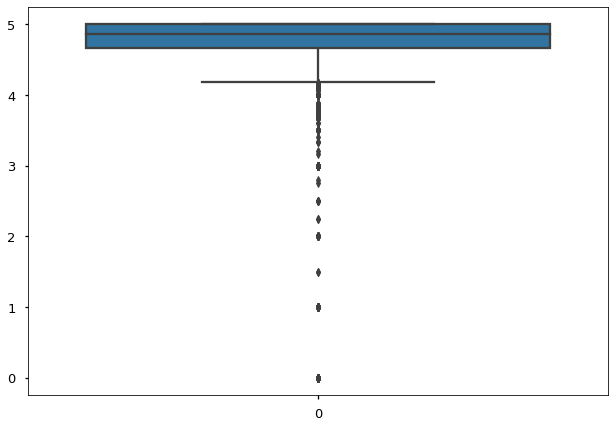

In [24]:
## Visualizing the pre-processed target values

sns.boxplot(data = df['review_scores_rating']);

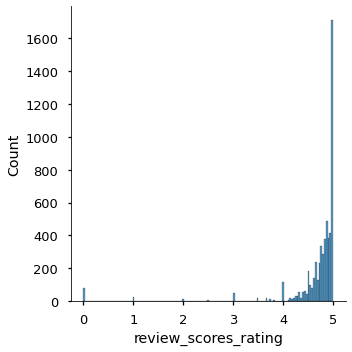

In [25]:
sns.displot(data=df['review_scores_rating']);

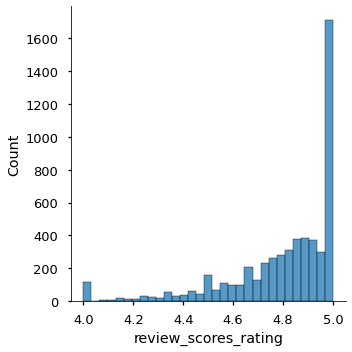

In [26]:
sns.displot(data=df['review_scores_rating'][df['review_scores_rating'] >= 4]);

In [27]:
## Calculating mean for target values
mean = df['review_scores_rating'].mean()
mean

4.683691540577699

In [28]:
## Calculating median for target values
median = df['review_scores_rating'].median()
median

4.86

---

>Based on this box plot and distributions, I see that **a large majority of the values are 4+, with a large number of values being 4.8+.**
>
>For the purposes of my classification (whether or not a given host would have a rating of 4+), I can fill the missing values with either the mean/median.
>
> **I will fill the missing values with the mean value of 4.68** to help ensure a fair representation of the overall data.

---

In [29]:
df.loc[:,'review_scores_rating'] = df.loc[:,'review_scores_rating'].fillna(median)

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [30]:
df['review_scores_rating'].describe()

count   7,897.00
mean        4.73
std         0.60
min         0.00
25%         4.76
50%         4.86
75%         4.94
max         5.00
Name: review_scores_rating, dtype: float64

In [31]:
cf.report_df(df)

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
host_since,object,2415,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_is_superhost,object,2,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_neighbourhood,object,183,605,0.08,nan,nan,nan,nan,nan,nan,nan,nan
host_listings_count,float64,57,0,0.00,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_total_listings_count,float64,57,0,0.00,"7,897.00",86.19,334.72,0.00,1.00,2.00,6.00,"3,924.00"
host_verifications,object,296,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_has_profile_pic,object,2,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
host_identity_verified,object,2,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
neighbourhood_cleansed,object,39,0,0.00,nan,nan,nan,nan,nan,nan,nan,nan
latitude,float64,5076,0,0.00,"7,897.00",38.91,0.02,38.82,38.90,38.91,38.92,39.00


In [32]:
## Resetting the index after dropping rows

df.reset_index(drop=True, inplace=True)

---

> At this point, I addressed most of the missing values in my dataset by dropping columns and filling missing values. There are still a few columns with missing values, but I will use a SimpleImputer combined with a GridSearchCV to determine the best method by which to fill those values.
>
> Now I will review the remaining data and determine if there are any other issues with my data.

---

RETURN ANCHOR FOR LINK <a name="leftoff"></a>

## 🎯 Inspecting the Target Variable

In [89]:
df['review_scores_rating'].value_counts(bins=5, sort=False, normalize=True)

(-0.006, 1.0]   0.01
(1.0, 2.0]      0.00
(2.0, 3.0]      0.01
(3.0, 4.0]      0.02
(4.0, 5.0]      0.95
Name: review_scores_rating, dtype: float64

In [90]:
df['review_scores_rating'][df['review_scores_rating'] < 4].value_counts(bins=4, sort=False, normalize=True)

(-0.004880000000000001, 0.97]   0.34
(0.97, 1.94]                    0.10
(1.94, 2.91]                    0.10
(2.91, 3.88]                    0.46
Name: review_scores_rating, dtype: float64

---

> The target feature, `'review_scores_rating'`, is currently a range of values from 0 to 5, with 95% of the scores being 4 or above. The above results show a sub-zero value; this is for the purpose of binning the values; the lowest value is actually 0.00.
>
> Of the scores less than 4, a little under half are between 3 and 4 (rounded) and about a third are between 0 and 1 (rounded).
>
> For my classification modeling, my classes are significantly imbalanced between values less/greater than 4 with a 5/95 split. I need to perform some over-sampling of the minority class to increase my model's performance.

---

## **🛠** Changing DataTypes

In [33]:
## Reviewing the remaining dataframe
df.head(3)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,f,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",$55.00,2,365,2,2,365,365,2.00,365.00,t,1,31,61,336,75,3,0,4.59,f,2,0,2,0
1,2008-12-12,f,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",$70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",t,9,39,69,344,429,0,0,4.82,f,2,0,2,0
2,2008-12-30,f,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",$54.00,30,180,30,30,180,180,30.00,180.00,t,29,59,89,179,102,0,0,4.66,f,1,0,1,0


**COMMENT:** what next? 

* DONE: T/F columns to 1/0


* DONE: 'host_since' to DT


* DONE: 'price' -$, to float


* DONE: 'neighbourhood_cleansed' split on ", " and convert to binary columns, then drop host_neighbourhood


* DONE: 'bathrooms_text' split on space, keep 1st part, convert to int


* 'host_verifications' - single string, needs extensive work in order to MLB

### Converting True/False Columns to Binary Values

In [34]:
## Creating list of true/false features to convert to 1/0, respectively

t_f_xf = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
          'has_availability','instant_bookable']
t_f_xf

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'has_availability',
 'instant_bookable']

In [35]:
## Converting datatype to "string" to replace values

df[t_f_xf] = df[t_f_xf].astype('str')
df[t_f_xf].dtypes

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


host_is_superhost         object
host_has_profile_pic      object
host_identity_verified    object
has_availability          object
instant_bookable          object
dtype: object

In [36]:
df[t_f_xf]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,f,t,t,t,f
1,f,t,t,t,f
2,f,t,t,t,f
3,t,t,t,t,f
4,f,t,t,t,f
...,...,...,...,...,...
7892,f,t,f,t,t
7893,f,t,t,t,t
7894,f,t,t,t,f
7895,f,t,t,t,t


In [37]:
## Converting t/f to 1/0, respectively

df[t_f_xf] = df[t_f_xf].replace({ 't' : 1, 'f' : 0})

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [38]:
df[t_f_xf]

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,0,1,1,1,0
1,0,1,1,1,0
2,0,1,1,1,0
3,1,1,1,1,0
4,0,1,1,1,0
...,...,...,...,...,...
7892,0,1,0,1,1
7893,0,1,1,1,1
7894,0,1,1,1,0
7895,0,1,1,1,1


In [39]:
df[t_f_xf] = df[t_f_xf].astype(int)

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [40]:
## Verifying results

cf.report_df(df[t_f_xf])

,datatypes,num_unique,null_sum,null_pct,count,mean,std,min,25%,50%,75%,max
host_is_superhost,int32,2,0,0.00,"7,897.00",0.25,0.44,0.00,0.00,0.00,1.00,1.00
host_has_profile_pic,int32,2,0,0.00,"7,897.00",1.00,0.05,0.00,1.00,1.00,1.00,1.00
host_identity_verified,int32,2,0,0.00,"7,897.00",0.82,0.39,0.00,1.00,1.00,1.00,1.00
has_availability,int32,2,0,0.00,"7,897.00",0.97,0.18,0.00,1.00,1.00,1.00,1.00
instant_bookable,int32,2,0,0.00,"7,897.00",0.41,0.49,0.00,0.00,0.00,1.00,1.00


### Converting Price to Float 

In [41]:
## Converting each value into a float for processing

try:
    df['price'] = df['price'].map(lambda price: price[1:].replace(',','')).astype('float')
    df['price'][0]
except Exception:
    print('\nValues are already processed and saved. No changes necessary')
    print(f"\nSample value: {df['price'][0]}")

<ipython-input-41-c32f3b780762>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].map(lambda price: price[1:].replace(',','')).astype('float')


In [42]:
df['price'].describe()

count    7,897.00
mean       185.65
std        322.32
min          0.00
25%         80.00
50%        119.00
75%        187.00
max     10,000.00
Name: price, dtype: float64

### Converting Host_Since to Datetime

In [43]:
df.head(2)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,0,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,1,1,31,61,336,75,3,0,4.59,0,2,0,2,0
1,2008-12-12,0,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,9,39,69,344,429,0,0,4.82,0,2,0,2,0


In [44]:
df.loc[:,'host_since'] = pd.to_datetime(df.loc[:,'host_since'])
df['host_since']

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


0      2008-11-26
1      2008-12-12
2      2008-12-30
3      2009-01-26
4      2009-01-13
          ...    
7892   2020-08-03
7893   2020-07-29
7894   2016-04-27
7895   2020-09-23
7896   2020-09-23
Name: host_since, Length: 7897, dtype: datetime64[ns]

In [45]:
df["host_since"].describe(datetime_is_numeric=True)

count                             7897
mean     2015-12-03 09:24:43.854665728
min                2008-11-21 00:00:00
25%                2014-04-06 00:00:00
50%                2015-10-15 00:00:00
75%                2017-04-21 00:00:00
max                2021-07-06 00:00:00
Name: host_since, dtype: object

### Bathrooms_Text to Num_Bathrooms

---

> Goal: to convert "bathrooms_text" into a new "num_bathrooms" column to indicate number of bathrooms at a host property.
>
> The old "bathrooms" feature was empty and was dropped as part of processing missing data.

---

In [46]:
## Checking current dataframe contents

df.head(3)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2008-11-26,0,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Historic Anacostia,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,1,1,31,61,336,75,3,0,4.59,0,2,0,2,0
1,2008-12-12,0,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,9,39,69,344,429,0,0,4.82,0,2,0,2,0
2,2008-12-30,0,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,"Eastland Gardens, Kenilworth",38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",54.00,30,180,30,30,180,180,30.00,180.00,1,29,59,89,179,102,0,0,4.66,0,1,0,1,0


In [47]:
## Checking for null values overall
df.isna().sum()[df.isna().sum() > 0]

host_neighbourhood    605
bathrooms_text          9
bedrooms              157
beds                   58
dtype: int64

In [48]:
## Inspecting a selection of values from the column to understand the values
df.loc[:,'bathrooms_text'][:21]

0       1 private bath
1     1.5 shared baths
2        1 shared bath
3              3 baths
4               1 bath
5               1 bath
6        1 shared bath
7               1 bath
8               1 bath
9     1.5 shared baths
10              1 bath
11    1.5 shared baths
12      1 private bath
13              1 bath
14    1.5 shared baths
15      1 private bath
16       1 shared bath
17           2.5 baths
18      1 private bath
19              1 bath
20                 NaN
Name: bathrooms_text, dtype: object

In [49]:
## Inspecting the rows in which there are null values
df[df['bathrooms_text'].isna()]

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
20,2010-10-04,1,Logan Circle,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.03,Entire home/apt,2,NaN,1.00,1.00,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",195.00,3,365,3,3,365,365,3.00,365.00,1,17,47,77,352,156,2,0,4.85,0,1,1,0,0
25,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.90,-76.99,Private room,1,NaN,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,4,13,18,197,10,0,0,4.89,0,3,0,3,0
26,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.98,Private room,1,NaN,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,1,14,20,198,10,0,0,4.90,0,3,0,3,0
120,2009-11-26,0,Capitol Hill,1.00,1.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Capitol Hill, Lincoln Park",38.89,-76.99,Entire home/apt,6,NaN,3.00,3.00,[],"2,000.00",4,4,4,4,4,4,4.00,4.00,1,30,60,90,365,0,0,0,4.86,0,1,1,0,0
5643,2019-11-18,0,Adams Morgan,3.00,3.00,"['email', 'phone']",1,1,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Hotel room,4,NaN,nan,nan,"[""First aid kit"", ""Long term stays allowed"", ""...",0.00,1,365,1,1,28,28,1.00,28.00,1,0,0,0,0,0,0,0,4.86,0,1,0,0,0
5684,2014-10-28,0,16th Street Heights,1.00,1.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Brightwood Park, Crestwood, Petworth",38.94,-77.03,Private room,2,NaN,1.00,1.00,"[""Shampoo"", ""Hot water"", ""Carbon monoxide alar...",85.00,30,180,30,30,1125,1125,30.00,"1,125.00",1,30,60,90,365,0,0,0,4.86,1,2,0,2,0
5754,2019-11-26,0,Mount Vernon Square,0.00,0.00,['phone'],0,1,"Downtown, Chinatown, Penn Quarters, Mount Vern...",38.90,-77.02,Hotel room,0,NaN,nan,nan,"[""Bed sheets and pillows"", ""First aid kit"", ""C...",0.00,1,365,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,0,0,0,4.86,0,1,0,0,0
5849,2019-08-22,0,U Street Corridor,0.00,0.00,"['email', 'phone']",1,1,"Howard University, Le Droit Park, Cardozo/Shaw",38.92,-77.03,Hotel room,0,NaN,nan,nan,"[""Bed sheets and pillows"", ""First aid kit"", ""O...",0.00,1,365,1,1,365,365,1.00,365.00,1,0,0,0,0,33,19,7,4.36,0,3,0,0,2
7441,2019-04-24,0,NaN,1.00,1.00,"['email', 'phone', 'offline_government_id', 's...",1,1,"Colonial Village, Shepherd Park, North Portal ...",39.00,-77.04,Private room,1,NaN,1.00,1.00,"[""Dedicated workspace"", ""Smoke alarm"", ""Shampo...",64.00,1,7,1,1,1125,1125,1.00,"1,125.00",1,16,46,76,351,0,0,0,4.86,0,1,0,1,0


In [50]:
## Filling null values with unique string ('Baths' not present otherwise)
## Unique string can be used later to check for any other zero baths

df.loc[:,'bathrooms_text'].fillna('0 Baths', inplace=True)

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [51]:
## Verifying all null values are filled
df.isna().sum()[df.isna().sum() > 0]

host_neighbourhood    605
bedrooms              157
beds                   58
dtype: int64

In [52]:
df.loc[:,'bathrooms_text'].isna().sum()

0

In [53]:
## Splitting each list into separate strings
df['num_bathrooms'] = df['bathrooms_text'].map(lambda x: x.split(' ')[0])
df['num_bathrooms'].value_counts()

<ipython-input-53-926c4f5fca7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_bathrooms'] = df['bathrooms_text'].map(lambda x: x.split(' ')[0])


1            5578
2             873
1.5           596
2.5           442
3.5           147
3             136
4              36
0              33
4.5            31
5.5             7
6               3
5               3
6.5             3
Half-bath       2
Shared          2
11              2
50              1
Private         1
8               1
Name: num_bathrooms, dtype: int64

In [54]:
## Verifying results that are words, not numbers

replace = ['Half-bath', 'Shared', 'Private']

for x in df['bathrooms_text']:
    for i in replace:
        if i in x:
            print(x)

Shared half-bath
Half-bath
Shared half-bath
Half-bath
Private half-bath


---

> **I will replace these values with the numeric value .5 as they are half-baths.** This will allow me to convert the column datatype to a float and use the column more easily in my modeling.

---

In [55]:
## Replacing string values with .5 to represent half-bathrooms

replace = {'Half-bath': .5, 'Shared': .5, 'Private': .5}

df['num_bathrooms'].replace(replace, inplace = True)

df['num_bathrooms'] = df['num_bathrooms'].astype(float)

C:\Users\bmcca\anaconda3\envs\learn-env-bmc\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-55-36f8771ec030>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_bathrooms'] = df['num_bathrooms'].astype(float)


In [56]:
## Inspecting resulting values

df['num_bathrooms'].value_counts(dropna=False)

1.00     5578
2.00      873
1.50      596
2.50      442
3.50      147
3.00      136
4.00       36
0.00       33
4.50       31
5.50        7
0.50        5
5.00        3
6.00        3
6.50        3
11.00       2
8.00        1
50.00       1
Name: num_bathrooms, dtype: int64

In [57]:
## Inspecting listings with more than 10 rooms

df[df['num_bathrooms'] >10]

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,num_bathrooms
1384,2016-01-31,0,Adams Morgan,7.00,7.00,"['email', 'phone', 'reviews']",1,0,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Shared room,1,11 shared baths,1.00,6.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",47.00,1,31,13,13,91,91,13.00,91.00,1,0,0,0,0,7,1,0,4.86,1,3,0,1,2,11.00
4228,2015-06-09,0,Edgewood,1.00,1.00,"['email', 'phone']",1,0,"Edgewood, Bloomingdale, Truxton Circle, Eckington",38.93,-77.00,Shared room,16,50 shared baths,1.00,50.00,"[""Cable TV"", ""First aid kit"", ""TV with standar...",60.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,27,57,87,87,0,0,0,4.86,0,1,0,0,1,50.00
6244,2016-01-31,0,Adams Morgan,7.00,7.00,"['email', 'phone', 'reviews']",1,0,"Kalorama Heights, Adams Morgan, Lanier Heights",38.92,-77.04,Shared room,1,11 shared baths,1.00,3.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",47.00,7,180,13,13,91,91,13.00,91.00,1,0,0,0,0,6,6,0,4.17,1,3,0,1,2,11.00


---

> After taking a look at the locations listed above on Google Maps (using their latitude/longitude), I feel like these three listings with more than 10 bathrooms are either duplicates or incorrect values (for 50 baths).
>
> Due to the questionable nature of these values, I will drop these rows to prevent these outliers from impacting my results.

---

In [58]:
## Identifying and using indices for rows with zero bathrooms for inspection

zero_bath_idx = df.loc[:,'bathrooms_text'][df['num_bathrooms'] == 0].index.to_list()

df.iloc[zero_bath_idx][:10]#['bathrooms_text']

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,num_bathrooms
20,2010-10-04,1,Logan Circle,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.03,Entire home/apt,2,0 Baths,1.00,1.00,"[""Cooking basics"", ""Lockbox"", ""Dedicated works...",195.00,3,365,3,3,365,365,3.00,365.00,1,17,47,77,352,156,2,0,4.85,0,1,1,0,0,0.00
25,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.90,-76.99,Private room,1,0 Baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,4,13,18,197,10,0,0,4.89,0,3,0,3,0,0.00
26,2009-01-26,1,Ivy City,5.00,5.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Ivy City, Arboretum, Trinidad, Carver Langston",38.91,-76.98,Private room,1,0 Baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",99.00,2,730,2,2,730,730,2.00,730.00,1,1,14,20,198,10,0,0,4.90,0,3,0,3,0,0.00
120,2009-11-26,0,Capitol Hill,1.00,1.00,"['email', 'phone', 'reviews', 'kba']",1,1,"Capitol Hill, Lincoln Park",38.89,-76.99,Entire home/apt,6,0 Baths,3.00,3.00,[],"2,000.00",4,4,4,4,4,4,4.00,4.00,1,30,60,90,365,0,0,0,4.86,0,1,1,0,0,0.00
486,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,2,0 baths,1.00,1.00,"[""Long term stays allowed"", ""Essentials"", ""Hea...",80.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,159,0,0,4.69,0,8,0,8,0,0.00
487,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,2,0 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Long t...",80.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,231,0,0,4.59,0,8,0,8,0,0.00
488,2015-03-05,0,Dupont Circle,8.00,8.00,"['email', 'phone', 'reviews']",1,1,"Dupont Circle, Connecticut Avenue/K Street",38.91,-77.04,Private room,1,0 baths,1.00,1.00,"[""Cable TV"", ""TV with standard cable"", ""Kitche...",95.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,0,0,256,0,0,4.56,0,8,0,8,0,0.00
803,2014-09-10,0,Columbia Heights,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,"Brightwood Park, Crestwood, Petworth",38.94,-77.03,Private room,1,0 baths,1.00,1.00,"[""Shampoo"", ""Dedicated workspace"", ""Kitchen"", ...",36.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,0,0,0,0,0,0,0,4.86,0,1,0,1,0,0.00
1178,2015-08-07,0,Petworth,3.00,3.00,"['email', 'phone', 'reviews', 'kba']",1,0,"Brightwood Park, Crestwood, Petworth",38.94,-77.02,Private room,1,0 shared baths,1.00,1.00,"[""Kitchen"", ""Carbon monoxide alarm"", ""Keypad"",...",65.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,30,60,90,365,43,0,0,4.86,0,3,0,3,0,0.00
1648,2013-09-09,1,NaN,1.00,1.00,"['email', 'phone', 'facebook', 'reviews']",1,0,"North Cleveland Park, Forest Hills, Van Ness",38.94,-77.06,Private room,2,0 shared baths,nan,0.00,"[""Elevator"", ""Dedicated workspace"", ""Long term...",150.00,1,1125,1,1,1125,1125,1.00,"1,125.00",1,0,0,9,284,25,0,0,5.00,0,1,0,1,0,0.00


---

> My review of the original bathroom text for the zero bathrooms column shows that the listings are associated with a private room. This would make sense as the listings may not include an option such as a shared bath, etc..
>
> Additionally I did fill 9 instances of missing values with "0 Baths," which would contribute slightly to this count.
>
> Overall, I feel the data is valid and I will use it for my modeling.

---

### Neighbourhood_Cleansed to Binary Columns

In [59]:
df.loc[:,'neighbourhood_cleansed']

0                                      Historic Anacostia
1       Edgewood, Bloomingdale, Truxton Circle, Eckington
2                            Eastland Gardens, Kenilworth
3          Ivy City, Arboretum, Trinidad, Carver Langston
4          Kalorama Heights, Adams Morgan, Lanier Heights
                              ...                        
7892     Congress Heights, Bellevue, Washington Highlands
7893       Howard University, Le Droit Park, Cardozo/Shaw
7894       Kalorama Heights, Adams Morgan, Lanier Heights
7895                                   Shaw, Logan Circle
7896    Columbia Heights, Mt. Pleasant, Pleasant Plain...
Name: neighbourhood_cleansed, Length: 7897, dtype: object

In [60]:
df.loc[:,'neighbourhood_cleansed'].dtype

dtype('O')

---

> The current values for "neighbourhood_cleansed" are a single string value. **I will separate each neighborhood and convert them into a binary column to represent whether or not that neighborhood is included in the listing, then drop the old column.**

---

In [61]:
## Testing the splitting between neighborhoods

df.loc[:,'neighbourhood_cleansed'][1].split(', ')

['Edgewood', 'Bloomingdale', 'Truxton Circle', 'Eckington']

In [62]:
## Converting values into a list of strings for each neighborhood

try:
    df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'] \
                                                .apply(lambda x: x.split(', '))
    display(df.loc[:,'neighbourhood_cleansed'])
except Exception:
    print('\nValues are already processed and saved. No changes necessary.')
    print(f"\nSample value: {df.loc[:,'neighbourhood_cleansed'][3]}")

<ipython-input-62-45f75edeb715>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'] \


0                                    [Historic Anacostia]
1       [Edgewood, Bloomingdale, Truxton Circle, Eckin...
2                          [Eastland Gardens, Kenilworth]
3        [Ivy City, Arboretum, Trinidad, Carver Langston]
4        [Kalorama Heights, Adams Morgan, Lanier Heights]
                              ...                        
7892    [Congress Heights, Bellevue, Washington Highla...
7893     [Howard University, Le Droit Park, Cardozo/Shaw]
7894     [Kalorama Heights, Adams Morgan, Lanier Heights]
7895                                 [Shaw, Logan Circle]
7896    [Columbia Heights, Mt. Pleasant, Pleasant Plai...
Name: neighbourhood_cleansed, Length: 7897, dtype: object

---

> The following code snippet is adapted from [here](https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list#:~:text=Sparse%20solution%20(for%20Pandas%20v0.25.0%2B)) by the user [Maxu](https://stackoverflow.com/users/5741205/maxu).

---

In [63]:
## Converting each neighborhood into a binary column and dropping old column

mlb = MultiLabelBinarizer()

try:
    df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('neighbourhood_cleansed')),
                              columns=mlb.classes_,index=df.index))
except Exception:
        print('\nValues are already processed and saved. No changes necessary.')

In [64]:
## Inspecting results

df.head(3)

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge
0,2008-11-26,0,Anacostia,2.00,2.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[""First aid kit"", ""Long term stays allowed"", ""...",55.00,2,365,2,2,365,365,2.00,365.00,1,1,31,61,336,75,3,0,4.59,0,2,0,2,0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2008-12-12,0,Eckington,0.00,0.00,"['email', 'phone', 'reviews', 'kba']",1,1,38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Dedicated...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,9,39,69,344,429,0,0,4.82,0,2,0,2,0,1.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2008-12-30,0,Eastland Gardens,3.00,3.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",1,1,38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[""Cooking basics"", ""First aid kit"", ""Keypad"", ...",54.00,30,180,30,30,180,180,30.00,180.00,1,29,59,89,179,102,0,0,4.66,0,1,0,1,0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

---

> After using the MultiLabelBinarizer, I successfully added a column for each neighborhood, indicating whether or not that neighborhood was included in the listing.
>
> This enables me to use the presence/absence of a  neighborhood as a category in my modeling.

---

### Host_Verifications to Binary Columns

In [65]:
df['host_verifications'][:10]

0    ['email', 'phone', 'reviews', 'jumio', 'offlin...
1                 ['email', 'phone', 'reviews', 'kba']
2    ['email', 'phone', 'facebook', 'reviews', 'jum...
3                 ['email', 'phone', 'reviews', 'kba']
4    ['email', 'phone', 'facebook', 'reviews', 'jum...
5    ['email', 'phone', 'reviews', 'offline_governm...
6    ['email', 'phone', 'facebook', 'reviews', 'jum...
7    ['email', 'phone', 'facebook', 'reviews', 'off...
8                 ['email', 'phone', 'reviews', 'kba']
9                 ['email', 'phone', 'reviews', 'kba']
Name: host_verifications, dtype: object

---

> For the "host_verifications" and "amenities" features, the values are a single string with several items within the string.
>
> It is somewhat similar to the "neighborhoods_cleaned" feature in the sense that I will need to filter out the individual items from the string. However, there is an added complication as I need to remove the brackets and quotations from the strings.
>
> Once I filter out the items, I will be able to use the MultiLabelBinarizer again to create more categories for each amenity.

---

In [66]:
## Testing the splitting between items

df.loc[:,'host_verifications'][1]

"['email', 'phone', 'reviews', 'kba']"

In [67]:
for x in ['host_verifications', 'amenities']:
    df[x] = df[x].str.replace('[', '')
    df[x] = df[x].str.replace(']', '')
    df[x] = df[x].str.replace("'", '')
    df[x] = df[x].str.replace('"', '')
    df[x] = df[x].apply(lambda x: x.split(', '))

In [68]:
## Converting each value into a binary column and dropping old column

mlb2 = MultiLabelBinarizer()
    
df = df.join(pd.DataFrame(mlb2.fit_transform(df.pop('host_verifications')),
                                  columns=mlb2.classes_,index=df.index))

df

,host_since,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,num_bathrooms,Adams Morgan,American University Park,Arboretum,Barnaby Woods,Barry Farm,Bellevue,Benning,Benning Heights,Bloomingdale,Brentwood,Brightwood,Brightwood Park,Brookland,Buena Vista,Burleith/Hillandale,Burrville,Buzzard Point,Capitol Hill,Capitol View,Cardozo/Shaw,Carver Langston,Cathedral Heights,Chevy Chase,Chinatown,Cleveland Park,Colonial Village,Columbia Heights,Congress Heights,Connecticut Avenue/K Street,Crestwood,Deanwood,Douglas,Downtown,Dupont Circle,Dupont Park,Eastland Gardens,Eckington,Edgewood,Fairfax Village,Fairlawn,Fairmont Heights,Foggy Bottom,Forest Hills,Fort Davis Park,Fort Dupont,Fort Lincoln,Fort McNair,Fort Totten,Foxhall Crescent,Foxhall Village,Friendship Heights,GWU,Garfield Heights,Gateway,Georgetown,Georgetown Reservoir,Glover Park,Grant Park,Greenway,Hawthorne,Hillbrook,Hillcrest,Historic Anacostia,Howard University,Ivy City,Kalorama Heights,Kenilworth,Kingman Park,Knox Hill,Lamont Riggs,Langdon,Lanier Heights,Le Droit Park,Lincoln Heights,Lincoln Park,Logan Circle,Mahaning Heights,Manor Park,Marshall Heights,Massachusetts Avenue Heights,Mayfair,McLean Gardens,Michigan Park,Mount Vernon Square,Mt. Pleasant,Navy Yard,Naylor Gardens,Near Southeast,North Capitol Street,North Cleveland Park,North Michigan Park,North Portal Estates,Palisades,Park View,Penn Branch,Penn Quarters,Petworth,Pleasant Hill,Pleasant Plains,Queens Chapel,Randle Highlands,River Terrace,Shaw,Shepherd Park,Sheridan,Shipley Terrace,Southwest Employment Area,Southwest/Waterfront,Spring Valley,Stanton Park,Summit Park,Takoma,Tenleytown,Trinidad,Truxton Circle,Twining,Union Station,University Heights,Van Ness,Washington Highlands,Wesley Heights,West End,Woodland-Normanstone Terrace,Woodland/Fort Stanton,Woodley Park,Woodridge,,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,reviews,selfie,sent_id,weibo,work_email
0,2008-11-26,0,Anacostia,2.00,2.00,1,1,38.86,-76.99,Private room,1,1 private bath,1.00,1.00,"[First aid kit, Long term stays allowed, Patio...",55.00,2,365,2,2,365,365,2.00,365.00,1,1,31,61,336,75,3,0,4.59,0,2,0,2,0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1
1,2008-12-12,0,Eckington,0.00,0.00,1,1,38.91,-77.00,Private room,2,1.5 shared baths,1.00,1.00,"[Cooking basics, First aid kit, Dedicated work...",70.00,2,1125,2,2,1125,1125,2.00,"1,125.00",1,9,39,69,344,429,0,0,4.82,0,2,0,2,0,1.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
2,2008-12-30,0,Eastland Gardens,3.00,3.00,1,1,38.91,-76.94,Private room,4,1 shared bath,1.00,1.00,"[Cooking basics, First aid kit, Keypad, Long t...",54.00,30,180,30,30,180,180,30.00,180.00,1,29,59,89,179,102,0,0,4.66,0,1,0,1,0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

---

> At this point, I successfully processed the 'host_verification' feature into distinct categories for modeling.
>
> In the future, I may attempt to do the same for the 'amenities' feature, but I don't want to create too many columns before my initial modeling.

---

#### Old Code

In [69]:
# for x in ['host_verifications', 'amenities']:
#     print(df[x])

In [70]:
# df['amenities'][:10]

In [71]:
# for x in ['host_verifications', 'amenities']:
#     df[x] = df[x].str.replace('and', '')

In [72]:
# ## Converting each value into a binary column and dropping old column

# mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [73]:
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace('[', '')
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace(']', '')
# df.loc[:,'host_verifications'] = df.loc[:,'host_verifications'].str.replace("'", '')

In [74]:
# df.loc[:,'host_verifications']

In [75]:
# df['amenities'] = df['amenities'].str.replace('[', '')
# df['amenities'] = df['amenities'].str.replace(']', '')
# df['amenities'] = df['amenities'].str.replace('"', '')

In [76]:
# df['amenities']

In [77]:
# df['amenities'] = df['amenities'].apply(lambda x: x.split(', '))

In [78]:
# df['amenities'][0]

In [79]:
# df['host_verifications'] = df['host_verifications'].apply(lambda x: x.split(', '))

In [80]:
# df['host_verifications'][0][0]

In [81]:
# def convert_to_col(df, list_cols):
#     '''For a given list of column names, separates each string value in the
#     column by the comma/space pattern to return new strings of single values.
    
#     Then, instantiates a MultiLabelBinarizer to create new columns for each 
#     new string to indicate the presence or absence of that string in the 
#     original column.'''
    
# #     mlb = MultiLabelBinarizer()
    
#     for x in list_cols:
#         try:
#             df[x] = df[x].apply(lambda x: x.split(', '))
#             print(f'Successfully split values in column "{x}"')
            
#         except Exception:
#             print('\nValues are already processed and saved.')
#             print(f"\nSample value: {df.loc[:,x][3]}")
            
# #         try:
# #             df = df.join(pd.DataFrame(mlb.fit_transform(df.pop(x)),
# #                                       columns=mlb.classes_,index=df.index))
# #         except Exception:
# #                 print('\nValues are already processed and saved.')
                
#     return df

In [82]:
# binarize_cols = ['host_verifications', 'amenities'] 

# convert_to_col(df, binarize_cols)

In [83]:
# ## Converting each value into a binary column and dropping old column

# mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [84]:
# # mlb = MultiLabelBinarizer()
    
# df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('amenities')),
#                                   columns=mlb.classes_,index=df.index))

In [85]:
# ## Converting values into a list of strings for each neighborhood

# try:
#     df['host_verifications'] = df['host_verifications'] \
#                                                 .apply(lambda x: x.split(', '))
#     display(df.loc[:,'host_verifications'])
# except Exception:
#     print('\nValues are already processed and saved. No changes necessary.')
#     print(f"\nSample value: {df.loc[:,'host_verifications'][3]}")
    
    

In [86]:
# ## Inspecting results

# df.head(3)

In [87]:
# test3 = df['host_verifications'][0]
# test3[1:-1].replace('"', "'").split(",")

In [88]:
# # df['Tags'] = df.Tags.apply(lambda x: x[1:-1].split(','))

# df['host_verifications'].apply(lambda x: x.split(','))[0]

# 🪓 **Train/Test Split**

---

> Before I run any further pre-processing, I split my data into training and test sets to allow me to test my model's performance.

---

In [91]:
# ## Creating features/target for dataset
# target = 'review_scores_rating'

# X = df_cleaned.drop(columns = target).copy()
# y = df_cleaned[target].copy()

In [92]:
# ## Confirming same number of rows
# X.shape[0] == y.shape[0]

In [93]:
# ## Splitting to prevent data leakage
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 🚿 **Preprocessing Pipeline**

In [94]:
# cat_cols = ['hotel', 'meal','arrival_date_month', 'country', 'market_segment',
#             'distribution_channel','is_repeated_guest','reserved_room_type',
#             'assigned_room_type','deposit_type', 'agent',
#             'customer_type','reservation_status']

# cont_cols = [col for col in X_train.drop(['reservation_status_date','company'],axis=1).columns if col not in cat_cols]

# cont_cols

In [95]:
# X_train[cat_cols] = X_train[cat_cols].astype(str)

In [96]:
# X_test[cat_cols] = X_test[cat_cols].astype(str)

In [97]:
# ## Creating ColumnTransformer and sub-transformers for imputation and encoding

# # Filling missing "Children"
# zero_transformer = SimpleImputer(strategy='constant', fill_value=0)

# ##  
# missing_transformer = SimpleImputer(strategy='constant', fill_value='missing')

# ## Encoding categoricals - handling errors to prevent issues w/ test set
# categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# cat_pipe = Pipeline(steps=[('imputer', missing_transformer),
#                       ('ohe', categorical_transformer)])

# cont_pipe = Pipeline(steps=[('imputer', zero_transformer),
#                            ('scaler', StandardScaler())])

# ## Instantiating the ColumnTransformer and including all transformers
# preprocessor = ColumnTransformer(
#     transformers=[('conts', cont_pipe, cont_cols),
#                   ('cats', cat_pipe, cat_cols)])

# preprocessor

In [98]:
# preprocessor.fit(X_train)

# ## Getting feature names from OHE
# ohe_cat_names = preprocessor.named_transformers_['cats'].named_steps['ohe'].get_feature_names(cat_cols)

In [99]:
# ## Generating list for column index
# final_cols = [*cont_cols, *ohe_cat_names]

# ## Fit and transform the data via the ColumnTransformer
# X_train_tf = preprocessor.transform(X_train)
# X_train_tf_df = pd.DataFrame(X_train_tf, columns=final_cols, index=X_train.index)

# ## Transforming the test set and saving
# X_test_tf = preprocessor.transform(X_test)
# X_test_tf_df = pd.DataFrame(X_test_tf, columns=final_cols, index=X_test.index)

# display(X_train_tf_df.head(5),X_test_tf_df.head(5))

# 📝 Next Steps

* Process classification model - i.e. Logreg, KNN, DecisionTrees, etc.
* Evaluate results
* Determine if I need to redo pre-processing steps

# 🚿 Classification Pipeline